<a href="https://colab.research.google.com/github/tgubbe/SuperstoreEDA/blob/main/Superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Superstore Exploratory Data Analysis**

This notebook is an exploratory data analysis project using the Superstore dataset available on Kaggle. The dataset can be found using the following link:

https://www.kaggle.com/datasets/vivek468/superstore-dataset-final?datasetId=1940216&language=Python

Performing exploratory data analysis on the data will help find trends and patterns that can be used to help the superstore determine their marketing strategy in regards to products, customers, and regions.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
%matplotlib inline
sns.set_style('darkgrid')

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **Setting Up the Data**

First, the data is read in and viewed to gain a sense of the data and determine how to perform the analysis.

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Datasets/Superstore.csv', encoding_errors= 'replace')

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

From above, we can see there are 9,994 entries and 21 total columns in the data. From the info(), there aren't any missing values. Most of the columns are string objects, which is helpful to keep in mind when grouping data.

Immediately, the Row ID column is dropped since there will is already a location associated for each entry.

In [ ]:
df = df.drop('Row ID', axis = 1)

In [ ]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


The describe() function is called to get basic statistics on the integer variables, including mean, standard deviation, and the minimum and maximum values.

In [ ]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,55191.576403,229.852846,3.789753,0.156188,28.660971
std,32065.074478,623.276074,2.225149,0.206457,234.271476
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.731000
50%,56560.000000,54.480000,3.000000,0.200000,8.671000
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


The data is checked for duplicates. From the code below, 1 duplicate value is found and is removed from the data.  

In [ ]:
df.duplicated().sum()

1

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

Now that the data has no missing values or duplicates, the columns can be explored to see the distribution of the data.

## **Basic Charts to View the Data**

Value counts are done for the Category, Sub-Category, and State columns. Since there are 50 states, only the 20 most popular states are printed.

In [ ]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2120
Technology         1847
Name: Category, dtype: int64

In [ ]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          616
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [ ]:
df['State'].value_counts()[:20]

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               468
Florida            383
Michigan           255
North Carolina     249
Arizona            224
Virginia           224
Georgia            184
Tennessee          183
Colorado           182
Indiana            149
Kentucky           139
Massachusetts      135
New Jersey         130
Oregon             124
Name: State, dtype: int64

A pie chart is created for the above Category value counts table, which allows us to view the percentage of order types for each category. This describes how many of the product orders taken were for office supplies, technology products, or furniture products.

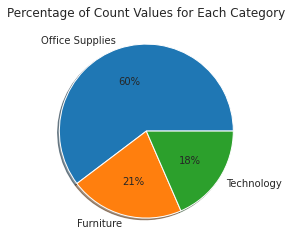

In [ ]:
sum_category = df['Category'].value_counts()
#Adds color to pie chart
colors = sns.color_palette()[0:3]
#Plots pie chart
plt.pie(sum_category.values, labels = sum_category.index, colors = colors, autopct = '%.0f%%', shadow = True)
plt.title('Percentage of Count Values for Each Category')
#Edit font size
plt.rcParams['font.size'] = 12

Countplots are created for the Sub-Category and State value count tables. To help with the readability of the plot, only the 10 most popular states are plotted.

Text(0.5, 1.0, 'Count Values for Each Sub-Category')

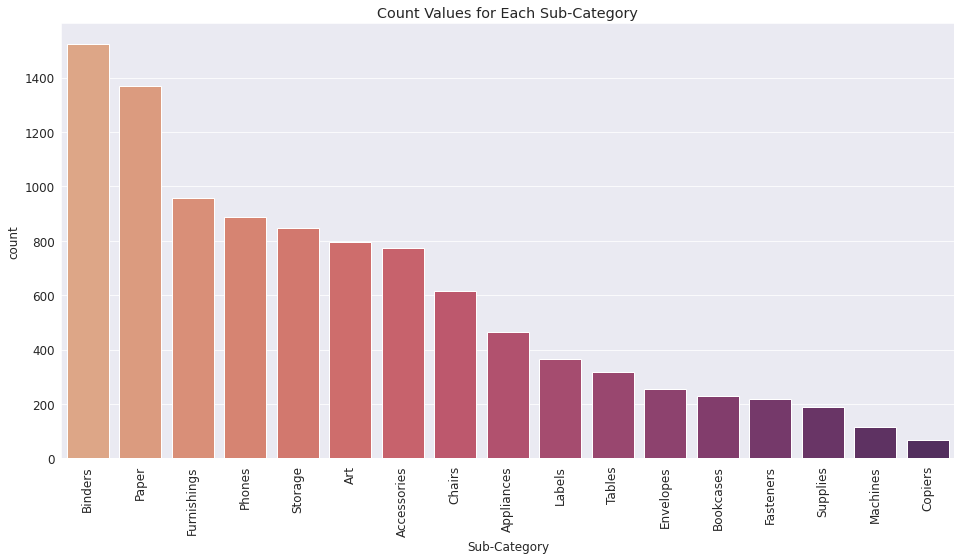

In [ ]:
plt.figure(figsize = (16,8))
ax = sns.countplot(x = 'Sub-Category', data = df, palette = 'flare', order = df['Sub-Category'].value_counts().index)
#Sets labels on x-axis to vertical
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_title('Count Values for Each Sub-Category')

Text(0.5, 1.0, 'Count Values for 10 Most Popular States')

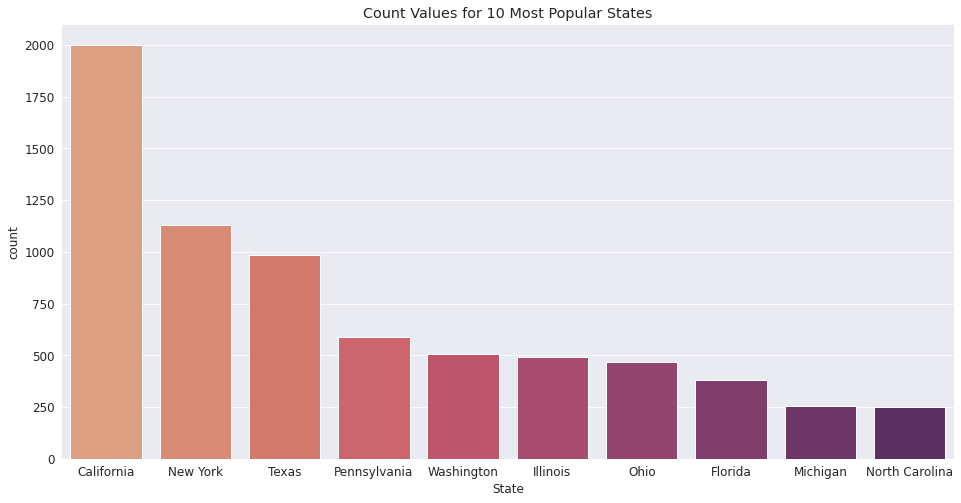

In [ ]:
plt.figure(figsize = (16,8))
ax = sns.countplot(x = 'State', data = df, palette = 'flare', order = df['State'].value_counts().index[:10])
ax.set_title('Count Values for 10 Most Popular States')

Text(0, 0.5, 'Total Quantity of Items')

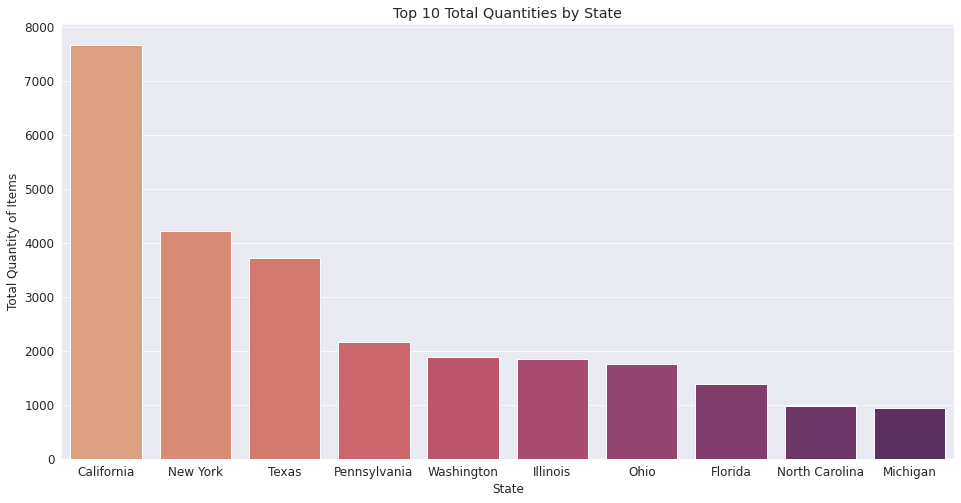

In [ ]:
#Group in descending order of total quantities by state
quantity_state = df.groupby('State', as_index = False).sum().sort_values(by = 'Quantity', ascending = False)
fig, ax = plt.subplots(figsize = (16,8))
#Create barplot of top 20 states in sales
sns.barplot(x = quantity_state['State'][:10], y = quantity_state['Quantity'][:10], palette = 'flare')
ax.set_title('Top 10 Total Quantities by State')
ax.set_ylabel('Total Quantity of Items')

From the countplot and barplot, the top 10 was mostly consistent between the total orders and total quantity orders. The only change in the top 10 order was between North Carolina and Michigan, where Michigan had more total orders but less total quantity than North Carolina.

A correlation plot is created to see if the relationships among the integer variables. From the plot, the strongest correlation is between sales and profit at 0.48. This is not surprising, as there should be a positive relationship between sales and profits (as sales go up, profit goes up).



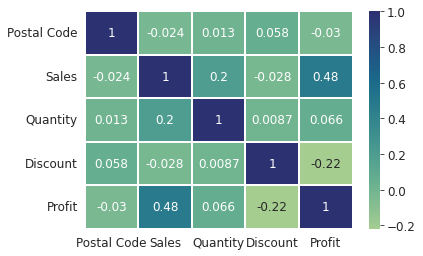

In [ ]:
#Correlation plot with only the integer variables
df_corr = df[['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']].corr()
#Sets heat map with the color and annotations inside each square
sns.heatmap(df_corr, cmap = 'crest', annot = True, linewidths = 1)

Two barplots are created to see the top 20 states in sales and profits.

Text(0.5, 0, 'Total Sales')

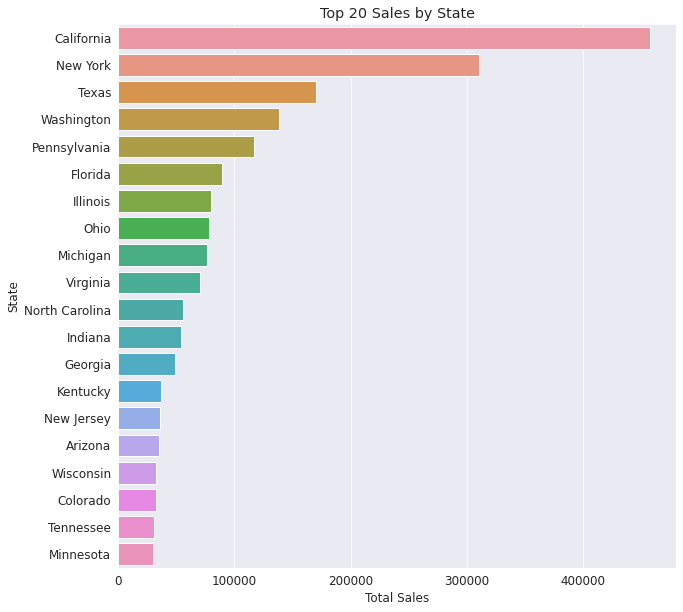

In [ ]:
#Group in descending order of total sales by state
sales_state = df.groupby('State', as_index = False).sum().sort_values(by = 'Sales', ascending = False)
fig, ax = plt.subplots(figsize = (10,10))
#Create barplot of top 20 states in sales
sns.barplot(x = sales_state['Sales'][:20], y = sales_state['State'][:20])
ax.set_title('Top 20 Sales by State')
ax.set_xlabel('Total Sales')

Text(0.5, 0, 'Total Profits')

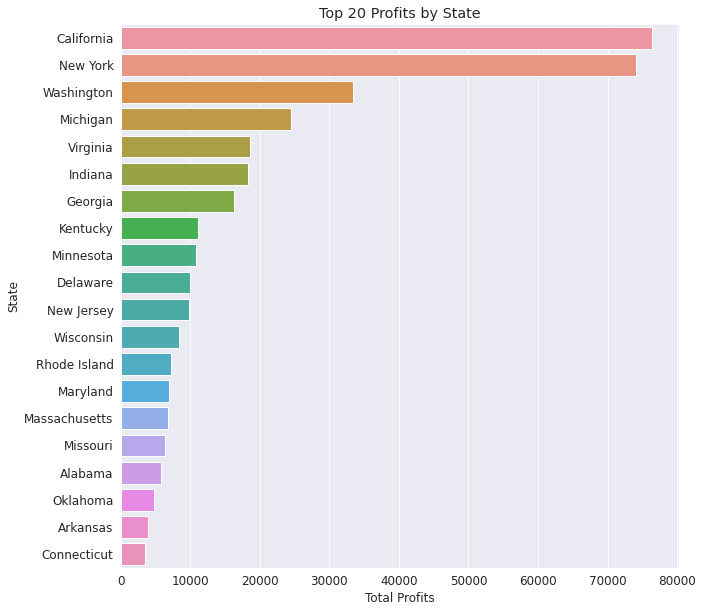

In [ ]:
#Group in descending order of total profit by state
profit_state = df.groupby('State', as_index = False).sum().sort_values(by = 'Profit', ascending = False)
fig, ax = plt.subplots(figsize = (10,10))
#Create barplot of top 20 states in profit
sns.barplot(x = profit_state['Profit'][:20], y = profit_state['State'][:20])
ax.set_title('Top 20 Profits by State')
ax.set_xlabel('Total Profits')

From the two barplots above, California and New York lead in both total sales and profits. Though Texas is 3rd in total sales, they are not in the top 20 in total profits. 

A countplot is created to view the total count for each category in each region. From the countplot, the West region seems to have the most products in each category.

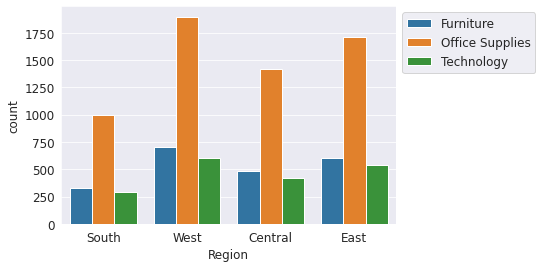

In [ ]:
ax = sns.countplot(x = 'Region', data = df, hue = 'Category')
ax.legend(bbox_to_anchor = (1,1))

Another set of barplots are created to display the total sales and profits for each region and category.

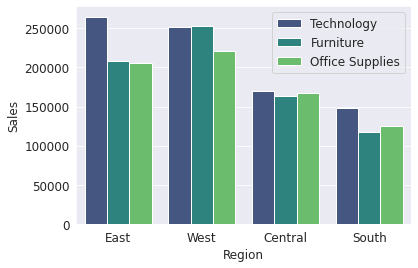

In [ ]:
cat_region_sales=df.groupby(['Region','Category']).sum('Sales').sort_values(by='Sales',ascending=False).reset_index()
ax1 = sns.barplot(x = 'Region', y = 'Sales', hue = 'Category', data = cat_region_sales, palette = 'viridis')
ax1.legend(loc = 'best')

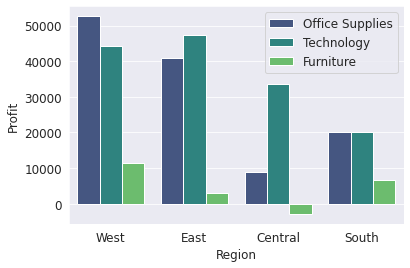

In [ ]:
cat_region_profit=df.groupby(['Region','Category']).sum('Sales').sort_values(by='Profit',ascending=False).reset_index()
ax1 = sns.barplot(x = 'Region', y = 'Profit', hue = 'Category', data = cat_region_profit, palette = 'viridis')
ax1.legend(loc = 'best')

From the barplots above, the west makes the most profit in Office Supplies, even though the East Region has the most sales for Office Supplies. Also, the East makes the most profit in Technology even though the West has higher sales numbers for Technology. Interestingly, the Central region has a negative profit for Furniture. 

## **Breakdown of Sales and Profits Over Time**

Next, I want to see the distribution of sales and profits based on the month and year. In order to do so, the Order Date column is split into Month and Year columns.

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].apply(lambda date:date.month)
df['Year'] = df['Order Date'].apply(lambda date:date.year)
df['Month_Year'] = df['Order Date'].apply(lambda date:date.strftime('%Y-%m'))
df.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Year,Month_Year
0,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,11,2016,2016-11
1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,11,2016,2016-11
2,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,6,2016,2016-06


Below are lineplots displaying the total sales and profits from 2014 - 2017.

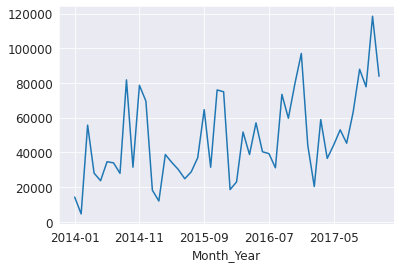

In [ ]:
df.groupby('Month_Year').sum()['Sales'].plot()

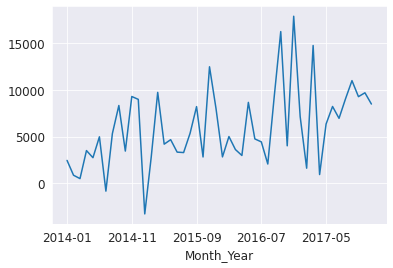

In [ ]:
df.groupby('Month_Year').sum()['Profit'].plot()

As a whole, the company's sales and profits have increased when comparing January 2014 to December 2017. However, this doesn't show the sales and profits split into regions or even individual states/store locations.

The lineplots below show the sales and profits for each month. This is a total count for sales and profits for each month every year. So, for March, it would include March 2014, March 2015, March 2016, and March 2017. This helps see which months generate the most sales/profits in each region.

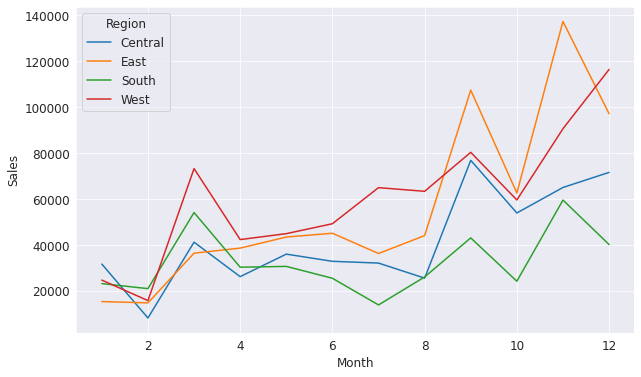

In [ ]:
#Calculate the total sales for each Region by month
byMonth_sales=df.groupby(['Region','Month']).sum('Sales').reset_index()
plt.figure(figsize = (10,6))
sns.lineplot(x = 'Month', y = 'Sales', hue = 'Region', data = byMonth_sales)

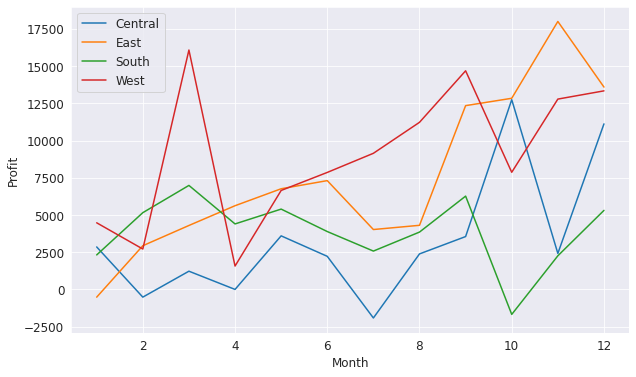

In [ ]:
# Calculate the total profit for each Region by month
byMonth_profit=df.groupby(['Region','Month']).sum('Profit').reset_index()
plt.figure(figsize = (10,6))
ax1 = sns.lineplot(x = 'Month', y = 'Profit', hue = 'Region', data = byMonth_profit)
ax1.legend(loc = 'best')

From a monthly standpoint, it appears the east and west regions generate the most sales and most profits. The central region seems to generate their most sales and profits near the end of the year (October - December) while the south region tends to do their best at the beginning of the year (January - March). 

In addition, two lineplots are done for the monthly sales and profits for each category.

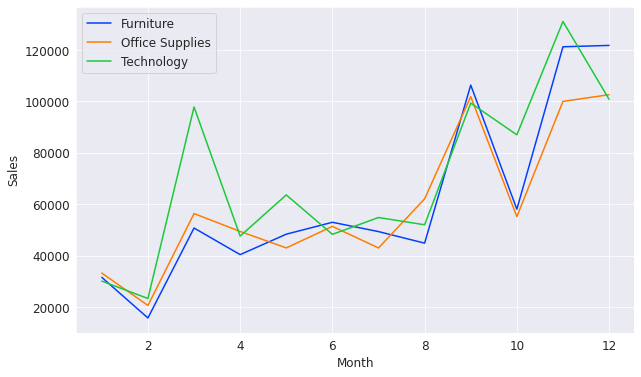

In [ ]:
# Calculate the total sales for each Category by month
byCategory=df.groupby(['Category','Month']).sum('Sales').reset_index()
plt.figure(figsize = (10,6))
ax = sns.lineplot(x = 'Month', y = 'Sales', hue = 'Category', data = byCategory, palette = 'bright')
ax.legend(loc = 'best')

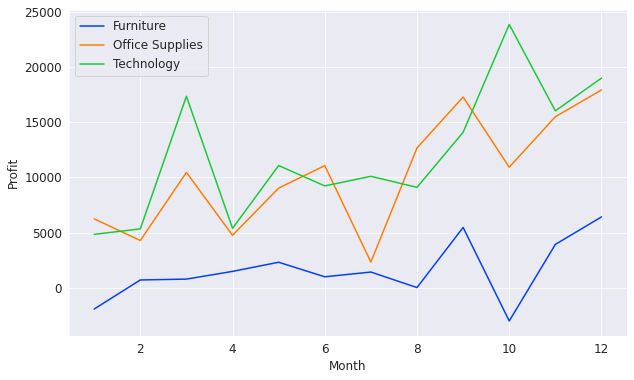

In [ ]:
# Calculate the total profit for each Category by month
byCategory=df.groupby(['Category','Month']).sum('Profit').reset_index()
plt.figure(figsize = (10,6))
ax = sns.lineplot(x = 'Month', y = 'Profit', hue = 'Category', data = byCategory, palette = 'bright')
ax.legend(loc = 'best')

From the lineplots, technology generates the most profit, while furniture seems to generate a lot of sales, but low profits.

To see the monthly breakdown for sales and profits from 2014 - 2017, a time series is created below.

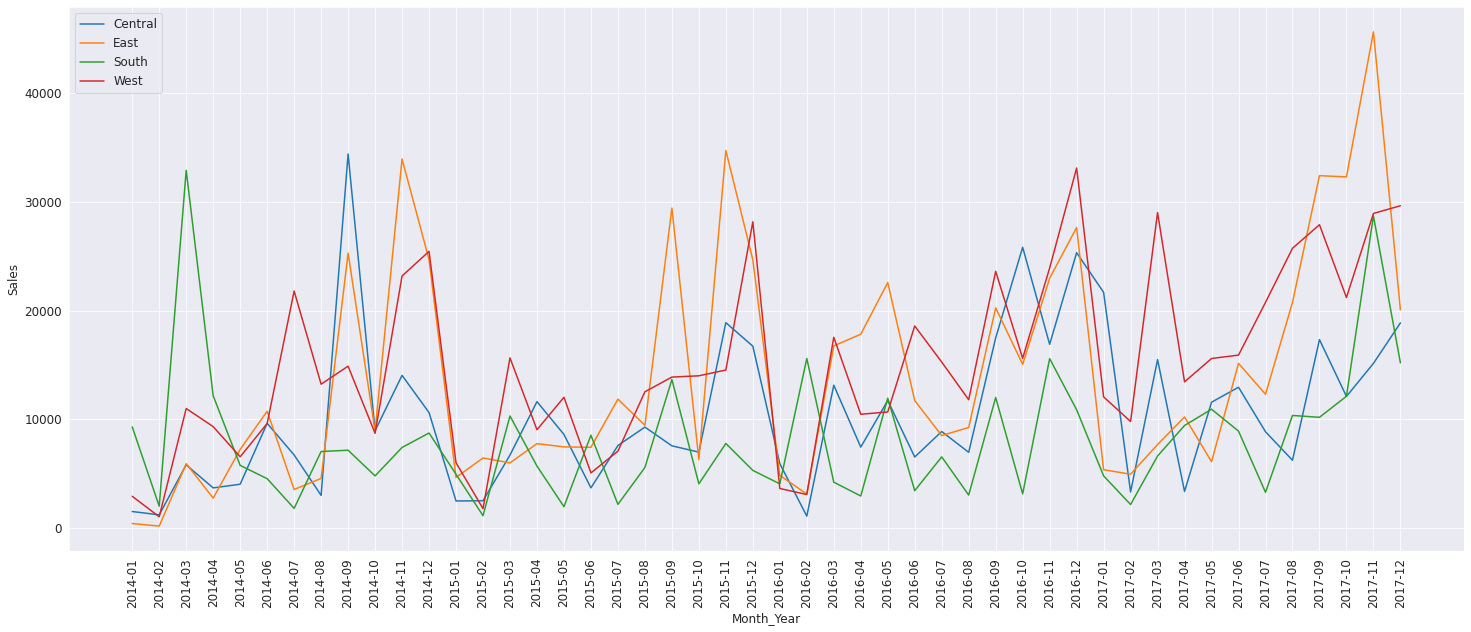

In [ ]:
byYear_sales=df.groupby(['Region','Month_Year']).sum('Sales').reset_index()
plt.figure(figsize = (25,10))
ax3 = sns.lineplot(x = 'Month_Year', y = 'Sales', hue = 'Region', data = byYear_sales)
for tick in ax3.get_xticklabels():
    tick.set_rotation(90)
ax3.legend(loc = 'upper left')

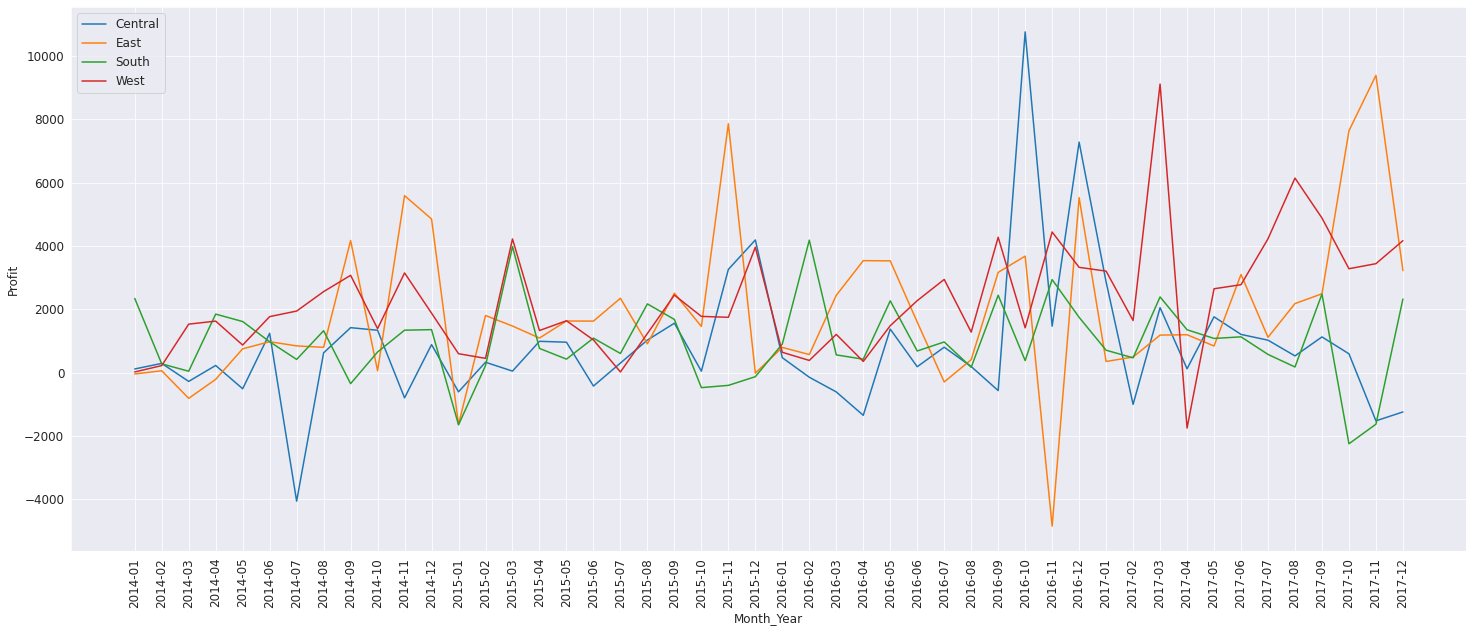

In [ ]:
byYear_profit=df.groupby(['Region','Month_Year']).sum('Profit').reset_index()
plt.figure(figsize = (25,10))
ax4 = sns.lineplot(x = 'Month_Year', y = 'Profit', hue = 'Region', data = byYear_profit)
for tick in ax4.get_xticklabels():
    tick.set_rotation(90)
ax4.legend(loc = 'upper left')

Not surprisingly, sales and profits have fluctuated over time, depending on the time of year. For example, it appears sales tend to increase at the end of the year due to the holidays and possible end-of-year sales.

Next, a heatmap will be created to see if the profits and number of sales have increased yearly and the sales patterns.

A table is created to group by the month and year for number of sales before creating the heatmap.

In [ ]:
monthQuantity = df.groupby(by = ['Month', 'Year']).sum()['Quantity'].unstack()
monthQuantity.head()

Year,2014,2015,2016,2017
Month,,,,
1,284,236,358,597
2,159,239,306,363
3,585,515,579,885
4,534,543,635,733
5,466,575,863,887


Text(0.5, 1.0, 'Number of Sales')

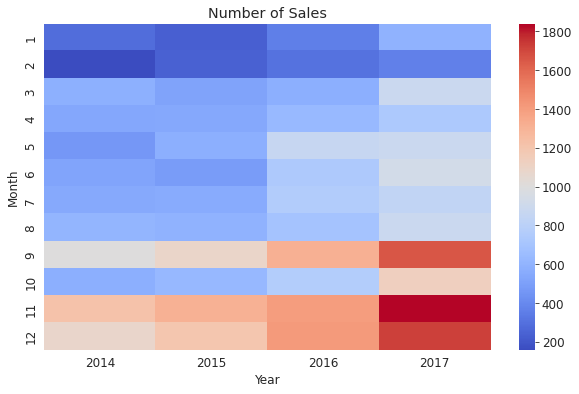

In [ ]:
plt.figure(figsize = (10,6))
ax = plt.axes()
sns.heatmap(monthQuantity, cmap = 'coolwarm', ax = ax)
ax.set_title('Number of Sales')

As expected, the number of sales tends to increase at the end of the year, and really slows down from the beginning to middle of the year.

The same table setup is created to group the year and month for the total profits. 

In [ ]:
monthProfit = df.groupby(by = ['Month', 'Year']).sum()['Profit'].unstack()
monthProfit.head()

Year,2014,2015,2016,2017
Month,,,,
1,2450.1907,-3281.0070,2824.8233,7140.4391
2,862.3084,2813.8508,5004.5795,1613.8720
3,498.7299,9732.0978,3611.9680,14751.8915
4,3500.8940,4187.4962,2977.8149,933.2900
5,2738.7096,4667.8690,8662.1464,6342.5828


Text(0.5, 1.0, 'Total Profit')

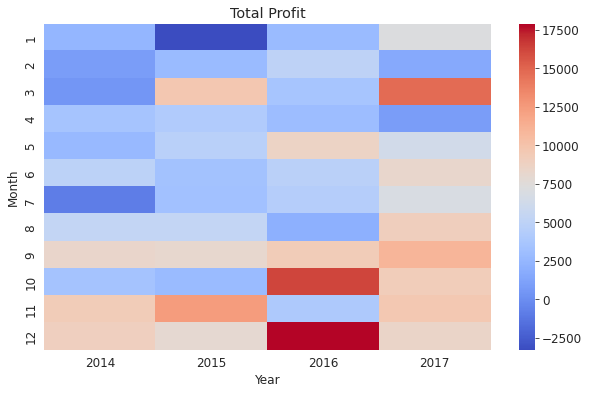

In [ ]:
plt.figure(figsize = (10,6))
ax = plt.axes()
sns.heatmap(monthProfit, cmap = 'coolwarm', ax = ax)
ax.set_title('Total Profit')

Overall, it seems the profits have increased yearly from 2014 - 2017, and have been more consistent in 2017 compared to prior years.

## **Sales and Profits for Top States by Sub-Categories**

A barplot can be executed to see the breakdown of total sales for the top 10 states by total sales quantities.

In [ ]:
# New table of the top 10 States by total Sales value
top10_states_sales = list(df.groupby('State').sum().sort_values(by = 'Sales', ascending = False)[:10].index)
filters = df['State'].isin(top10_states_sales)
top_states_sales = df[filters]
# New table of the top 5 sub-categories by total sales
subcats_sales = top_states_sales['Sub-Category'].value_counts().index.values.tolist()[:5]
top5_subcats_sales = top_states_sales[top_states_sales['Sub-Category'].isin(subcats_sales)]
# Creates a new table displaying the total sales for each of the five sub-categories for the top 10 states listed in the filter above
top5_subcats_sales = top5_subcats_sales.groupby(['State', 'Sub-Category'], as_index = False).sum('Sales').sort_values('Sales', ascending = False).reset_index()

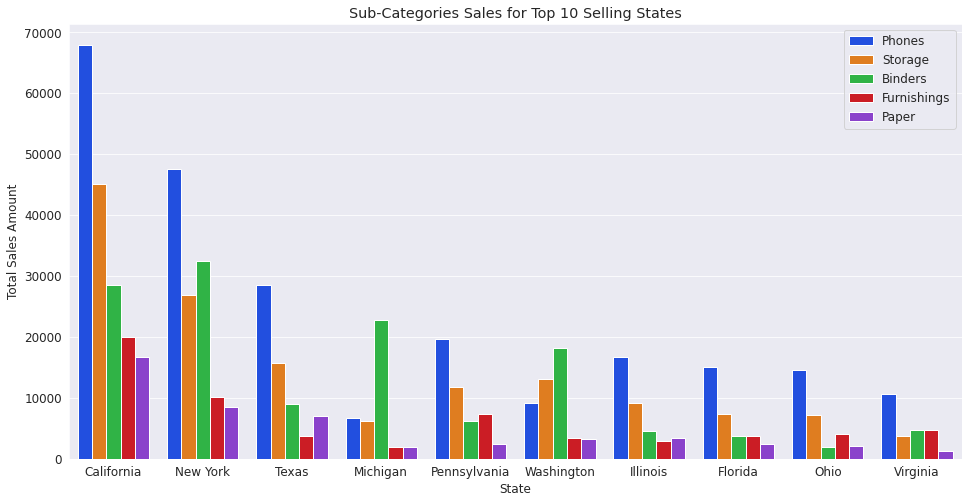

In [ ]:
#Creates a barplot of the top 10 selling states with each of their sales amounts of the 5 sub-categories listed in the top5_subcats_sales filter
fig, ax = plt.subplots(figsize = (16,8))
sns.barplot(x = 'State', y = 'Sales', hue = 'Sub-Category', data = top5_subcats_sales, palette = 'bright')
ax.set_title('Sub-Categories Sales for Top 10 Selling States')
ax.set_xlabel('State')
ax.set_ylabel('Total Sales Amount')
ax.legend(loc = 'best')

From the plot above, the sub-category with the highest sales was phones, with the most amount of sales taking place in California.

Next, a barplot is done for the total profits of the top 10 selling states. It's expected that the profits would line up the same as the sales, with California expected to have the highest profit and Viriginia expected to have the lowest profit out of the 10 states listed.

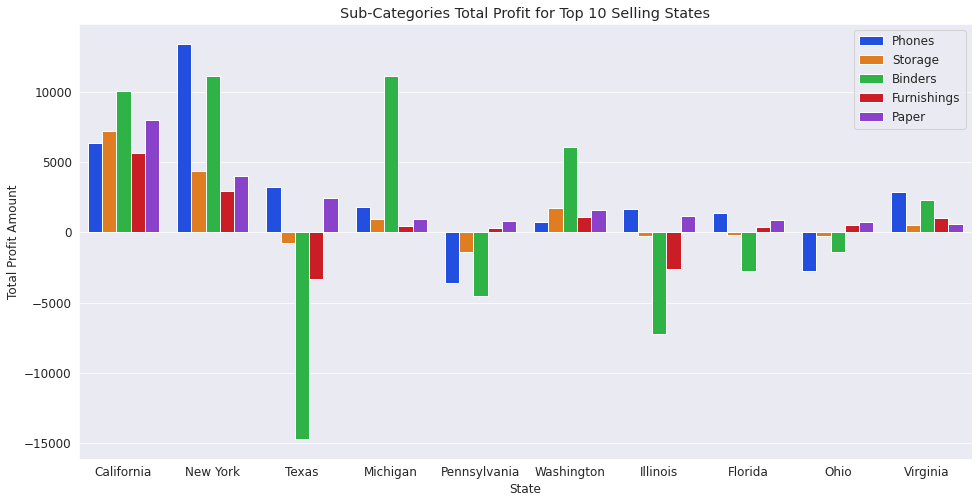

In [ ]:
#Creates a barplot of the top 10 selling states with each of their sales amounts of the 5 sub-categories listed in the top5_subcats_sales filter
fig, ax = plt.subplots(figsize = (16,8))
sns.barplot(x = 'State', y = 'Profit', hue = 'Sub-Category', data = top5_subcats_sales, palette = 'bright')
ax.set_title('Sub-Categories Total Profit for Top 10 Selling States')
ax.set_xlabel('State')
ax.set_ylabel('Total Profit Amount')
ax.legend(loc = 'best')

Instead, New York has the highest profit, while Texas appears to have the lowest profit of the 10 highest selling states. In fact, Texas, Pennsylvania, Illinois, Florida, and Ohio have sub-categories with a negative profit value.

A new barplot is created to find the top 10 most profitable states.

In [ ]:
# New table of the top 10 States by total Profit value
top10_states_profit = list(df.groupby('State').sum().sort_values(by = 'Profit', ascending = False)[:10].index)
top10_states_profit
filters_profit = df['State'].isin(top10_states_profit)
top_states_profit = df[filters_profit]
# New table of the top 5 sub-categories by total profits
subcats_profit = top_states_profit['Sub-Category'].value_counts().index.values.tolist()[:5]
top5_subcats_profit = top_states_profit[top_states_profit['Sub-Category'].isin(subcats_profit)]
# Creates a new table displaying the total profit for each of the five sub-categories for the top 10 states listed in the filter above
top5_subcats_profit = top5_subcats_profit.groupby(['State', 'Sub-Category'], as_index = False).sum('Profit').sort_values('Profit', ascending = False).reset_index()

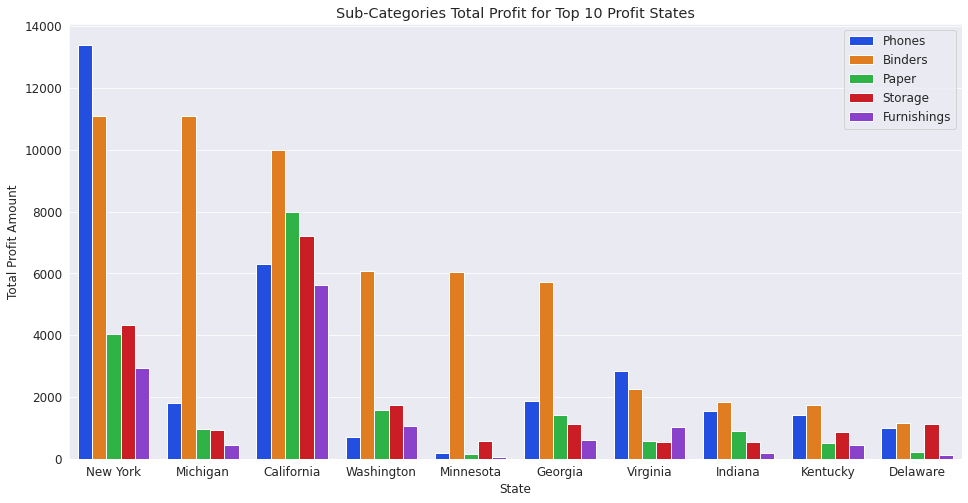

In [ ]:
#Creates a barplot of the top 10 profitable states with each of their profit amounts of the 5 sub-categories listed in the top5_subcats_profit filter
fig, ax = plt.subplots(figsize = (16,8))
sns.barplot(x = 'State', y = 'Profit', hue = 'Sub-Category', data = top5_subcats_profit, palette = 'bright')
ax.set_title('Sub-Categories Total Profit for Top 10 Profit States')
ax.set_xlabel('State')
ax.set_ylabel('Total Profit Amount')
ax.legend(loc = 'best')

As seen from the barplot above, the top 10 states in sales are not the same as the top 10 states in profits. The only states that are on both lists are New York, California, Washington, Michigan, and Virginia. 

So what are the total sales for the 10 most profitable states  given the 5 most common sub-categories? A barplot is created to find out. 

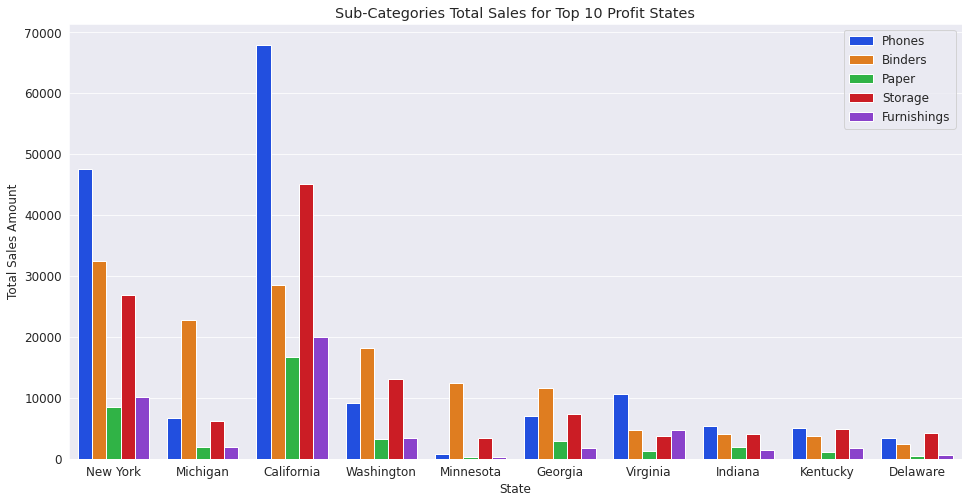

In [ ]:
fig, ax = plt.subplots(figsize = (16,8))
sns.barplot(x = 'State', y = 'Sales', hue = 'Sub-Category', data = top5_subcats_profit, palette = 'bright')
ax.set_title('Sub-Categories Total Sales for Top 10 Profit States')
ax.set_xlabel('State')
ax.set_ylabel('Total Sales Amount')
ax.legend(loc = 'best')

Interestingly, Michigian has a low sales amount compared to New York and California, but has a higher amount of profit than California. This seems to be led by the sales of binders, which is Michigan's highest sales item among the 5 sub-categories listed.

## **Conclusion**

This notebook performed Exploratory Data Analysis to find the patterns and trends in the Superstore data. Most notably, large states such as California and New York had large sales and profits, but some unexpected states such as Virginia and Kentucky made it in the top 10 in profits for the 5 most commonly sold sub-categories. 

This notebook also looked into the sales and profits across the four regions (North, South, East, and West). It appears the East and West regions have performed well, while the South region has struggled in profits, most likely due to its small profit margin in furniture sales.

This analysis is useful for the Superstore company to view and determine their marketing strategy, particularly during slow sales times. I would recommend selling less furniture and focusing on sales for office supplies and technology products.

Thank you for viewing my notebook!
